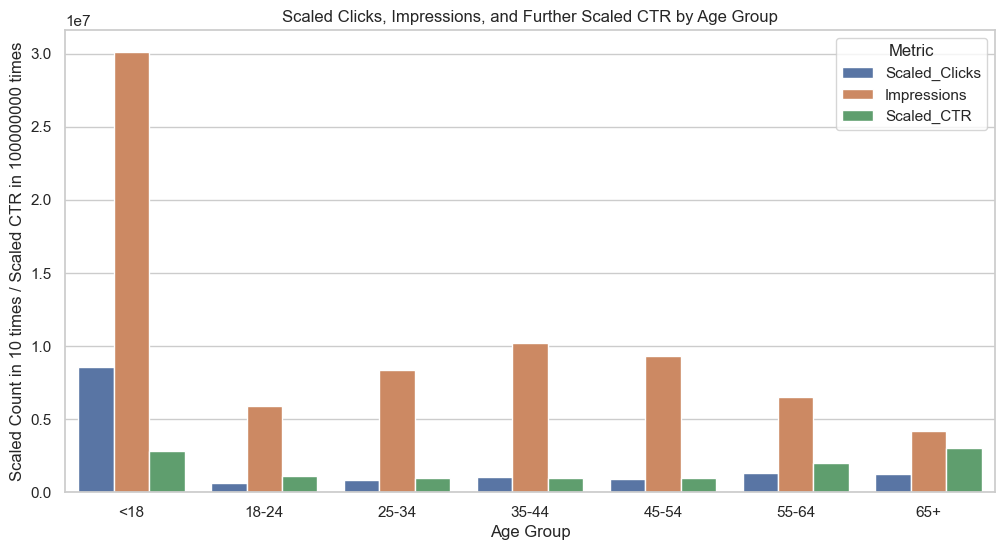

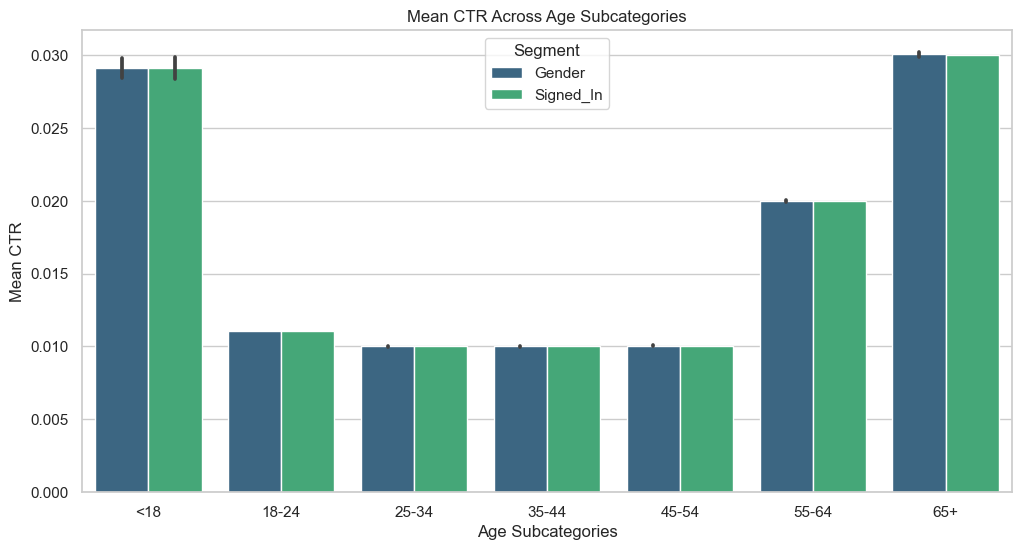

      Segment age_group  Gender      mean    median  var       max        Q1  \
0      Gender       <18     0.0  0.028405  0.028405  NaN  0.028405  0.028405   
1      Gender       <18     1.0  0.029833  0.029833  NaN  0.029833  0.029833   
2      Gender     18-24     0.0  0.011054  0.011054  NaN  0.011054  0.011054   
3      Gender     18-24     1.0  0.011070  0.011070  NaN  0.011070  0.011070   
4      Gender     25-34     0.0  0.010036  0.010036  NaN  0.010036  0.010036   
5      Gender     25-34     1.0  0.009999  0.009999  NaN  0.009999  0.009999   
6      Gender     35-44     0.0  0.010058  0.010058  NaN  0.010058  0.010058   
7      Gender     35-44     1.0  0.009984  0.009984  NaN  0.009984  0.009984   
8      Gender     45-54     0.0  0.010104  0.010104  NaN  0.010104  0.010104   
9      Gender     45-54     1.0  0.010007  0.010007  NaN  0.010007  0.010007   
10     Gender     55-64     0.0  0.020083  0.020083  NaN  0.020083  0.020083   
11     Gender     55-64     1.0  0.01994

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataFromFiles = pd.DataFrame({})

for number in range(31):
    dataFromFile = pd.read_csv("nyt" + str(number + 1) + ".csv")
    dataFromFiles = pd.concat([dataFromFiles, dataFromFile])

age_bins = [0, 18, 25, 35, 45, 55, 65, float('inf')]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

dataFromFiles['age_group'] = pd.cut(dataFromFiles['Age'], bins=age_bins, labels=age_labels, right=False)

agg_data = dataFromFiles.groupby('age_group', observed=False)[['Clicks', 'Impressions']].sum().reset_index()

agg_data['CTR'] = agg_data['Clicks'] / agg_data['Impressions']

# Scale 'Clicks' and CTR for better visibility
agg_data['Scaled_Clicks'] = agg_data['Clicks'] * 10  # Adjust the scaling factor as needed
agg_data['Scaled_CTR'] = agg_data['CTR'] * 100000000  # Adjust the scaling factor as needed

# Melt the DataFrame to combine 'Scaled_Clicks', 'Impressions', and 'Scaled_CTR' into a single column
melted_data = pd.melt(agg_data, id_vars='age_group', value_vars=['Scaled_Clicks', 'Impressions', 'Scaled_CTR'], var_name=['Metric'])

# Create a bar plot with 'Metric' as hue
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='value', hue='Metric', data=melted_data)

# Add labels and legend
plt.xlabel('Age Group')
plt.ylabel('Scaled Count in 10 times / Scaled CTR in 100000000 times')  # Adjust the y-axis label accordingly
plt.title('Scaled Clicks, Impressions, and Further Scaled CTR by Age Group')
plt.legend(title='Metric')

user_segments = ['Gender', 'Signed_In']

# Initialize an empty list to store result metrics
result_metrics = []

# Iterate over each user segment
for segment in user_segments:
    # Group data by age group and the current user segment
    grouped_data = dataFromFiles.groupby(['age_group', segment], observed=False).agg({'Clicks': 'sum', 'Impressions': 'sum'}).reset_index()

    # Calculate CTR for each age group and user segment
    grouped_data['CTR'] = grouped_data['Clicks'] / grouped_data['Impressions']

    # Calculate additional metrics
    metrics = grouped_data.groupby(['age_group', segment], observed=False)['CTR'].agg(['mean', 'median', 'var', 'max', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]).reset_index()
    metrics.rename(columns={'<lambda_0>': 'Q1', '<lambda_1>': 'Q3'}, inplace=True)

    # Add segment information to the resulting DataFrame
    metrics.insert(0, 'Segment', segment)
    result_metrics.append(metrics)

# Concatenate the resulting metrics for different segments into a single DataFrame
result_df = pd.concat(result_metrics, ignore_index=True)

sns.set(style="whitegrid")

# Create a bar plot for mean CTR across age subcategories
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='mean', hue='Segment', data=result_df, palette='viridis')
plt.title('Mean CTR Across Age Subcategories')
plt.xlabel('Age Subcategories')
plt.ylabel('Mean CTR')

plt.show()
print(result_df)